In [1]:
import pandas as pd
%matplotlib inline

In [2]:
start = pd.Timestamp("2002-01-02")
end = pd.Timestamp("2015-12-30")
year = pd.Timedelta('365 days')
fetch_data = False

In [3]:
if fetch_data:
    import Quandl
    import pandas_datareader.data as web
    
    ipsa = web.DataReader("^IPSA", 'yahoo', start, end)
    usdclp = Quandl.get("CURRFX/USDCLP")
    ipsa.to_csv('ipsa_clp.csv')
    usdclp.to_csv('usdclp.csv')
else:
    ipsa = pd.read_csv('ipsa_clp.csv', index_col='Date', parse_dates=True)
    usdclp = pd.read_csv('usdclp.csv', index_col='Date', parse_dates=True)

In [4]:
df = pd.DataFrame()
df['ipsa_clp'] = ipsa[u'Adj Close']
df['usdclp'] = usdclp.Rate
df['ipsa_usd'] = df.ipsa_clp / df.usdclp

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000000000C36D240>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x000000000C539240>], dtype=object)

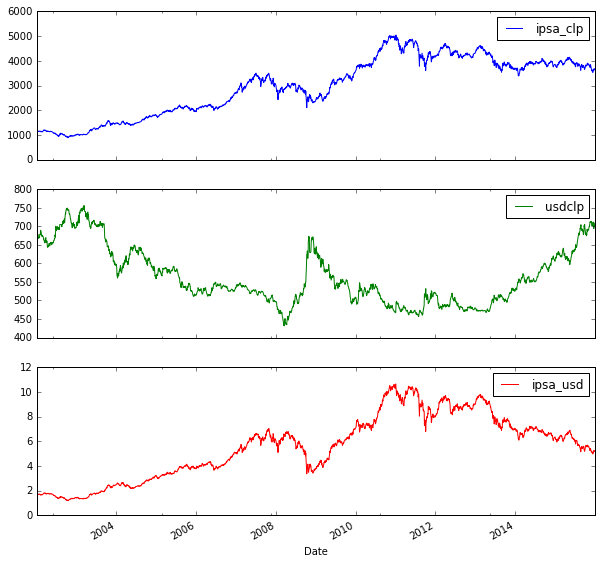

In [5]:
df.plot(subplots=True, figsize=(10, 10), sharex=True)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000000000CF98BE0>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x000000000D1A3EF0>], dtype=object)

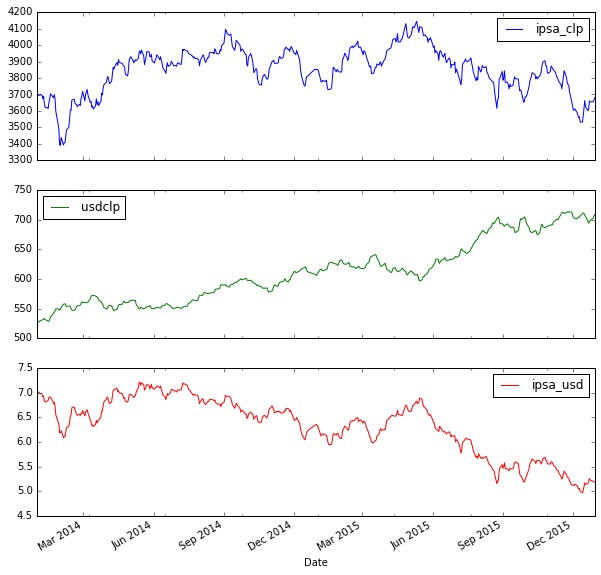

In [6]:
# Los últimos 2 años
df.loc[(end - 2*year):].plot(subplots=True, figsize=(10, 10), sharex=True)